## README

This rosject is an existing example of an new environment for using ROSBOT 2.0 Pro. You can use it for your first assigment but also for any projects or work you want to do on the side. 

To create this rosject, all we had to do was to create a new rosject from scratch and choose noetic for the version of the rosject and an empty world.

Installation of Rosbot in your rosject:

If you have created an empty ROS Noetic Rosject, you need to install the ROSBOT packages first using the following commands:

cd catkin_ws/src

git clone https://github.com/husarion/rosbot_ros.git

cd ..

catkin_make

source devel/setup.bash

cd catkin_ws/src

git clone https://github.com/EC-3DRC/b31ys_launcher.git

Now start the simulation in a terminal:

roslaunch rosbot_bringup rosbot_rviz.launch

Start Teleop in another:

rosrun teleop_twist_keyboard tele_keyboard.py

In rviz go to Global Options and change the frame of reference to /odom (to be in world frame) or /base_link to be in body frame.

You can now create you own packages and start working.

Connecting to the real robot:

First, close the simulation environment that you have launched

Then on a terminal do the following:

ssh husarion@master
passwd: husarion

This will connect you to the robot. Then start the robot base code using the command:

roslaunch b31ys_launcher b31ys.launch

On a new terminal on the rosject do:

roslaunch b31ys_launcher b31ys_rviz.launch

You can now work on the real robot.


## Gowresh Rajagopal - H00413256
## Assignment 1 - Reactive Obstacle Avoidance

### TASK 1 - Setting up the necessary ROS tools to work on your development

1. The created package name is 'assignment_1' in catkin_ws 
2. The python file that contains task 1 is 'lidar.py'
3. The launch file that launches the python file is 'lidar.launch'
4. The variable that stores the lidar ranges is 'scan'
5. The odom topic has been subscribed through 'self.odom' and the callback function is 'self.odom_callback'
6. In the 'self.odom_callback' function the orientation quaternion is converted into euler and the resulting roll, pitch and yaw is stored in 'self,roll', 'self.pitch' and 'self.yaw'.

To run the file one of the following commands can be used:

rosrun assignment_1 lidar.py

roslaunch assignment_1 lidar.launch

*****End of Task 1*****

### TASK 2 - Mapping using occupancy grid

rosrun assignment_1 lidar.py

roslaunch assignment_1 lidar.launch

The Task 2 is also done in the python file 'lidar.py'
1. 'self.pmap' is the grid structure created to store the location of obstacles
2. In the 'self.lidar_callback' function, the laser scan ranges are stored as numpy array and the inf & -inf values are replaced with 0. Then the lidar angles were formed based on the angle_max, angle_min and angle_increment from laser data. The r*cos(angle) and r*sin(angle) were stored in ox, oy as obstacles in laser frame. 
3. From the 'self.odom_callback' function. the rotation matrix and the translation matrix were found.
        Note: the yaw values had to be adjusted to the maximum and minimu values to avoid the misalignment of the map
4. The obstacle data were converted from laser frame to world(odom) frame and the x,y values were stored as world_x and world_y varibales.
5. Based on the world_x and world_y values, the self.pmap grid was populated with the obstacle data.
6. The following values were chosen for populating, publishing and visualising the map in rviz:-
   Resolution of the map: 0.2
   Width: 75
   Height: 75
   Origin x,y: (-15/2), (-15/2)
   Frame: 'odom'
7. The generated occupancy grid was published in the topic '/map'
8. The following is the screenshot of the generated map visualised in Rviz:

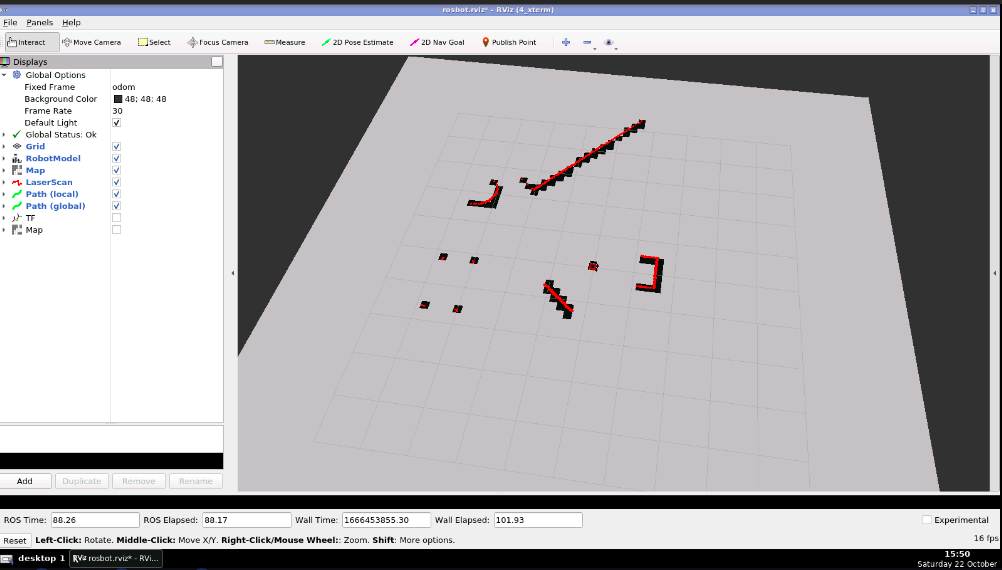
   

*****End of Task 2*****

### Task 3 Obstacle avoidance using potential fields 

Launch files used:-

roslaunch assignment_1 lidar.launch

roslaunch assignment_1 potential_field.launch

Note: Launching the script will cause the robot to move towards the goal point immediately.

The task 3 is done in the python file 'potential_field.py'

1. The launch file 'potential_field.launch' has the goal parameters goal_x and goal_y
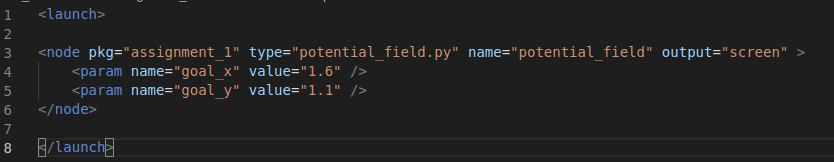
2. In the python file 'potential_field.py', the goal paramers are loaded into the list variable self.goal
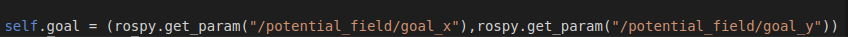
3. The attraction potential field was created for the goal parameters in the python file using the occupancy grid generated in task 2. The resulting force values were visualised as another occupancy grid through topic '/att_field_map' in Rviz. 
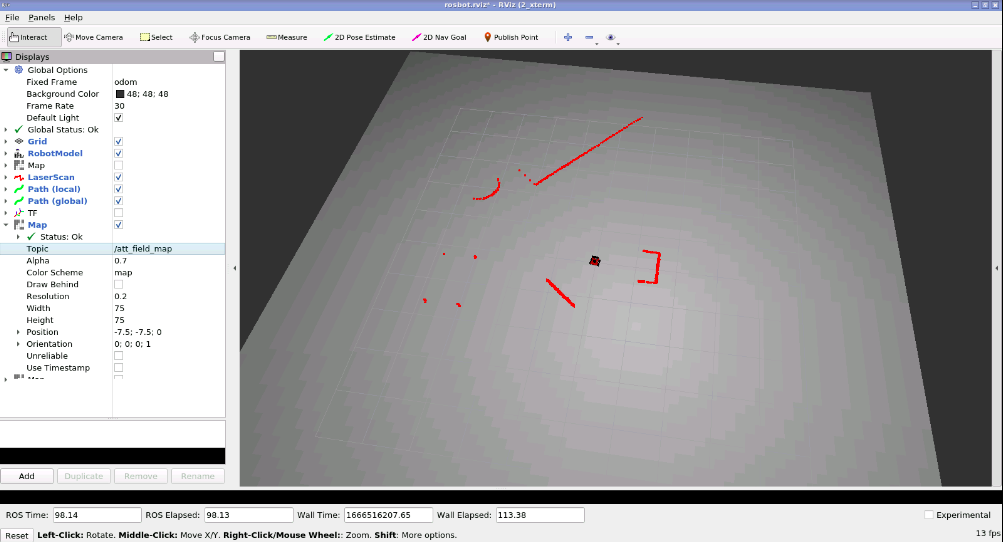
Alternatively the '2D Nav Goal' can also be used to give new goals and the results can be visualised.
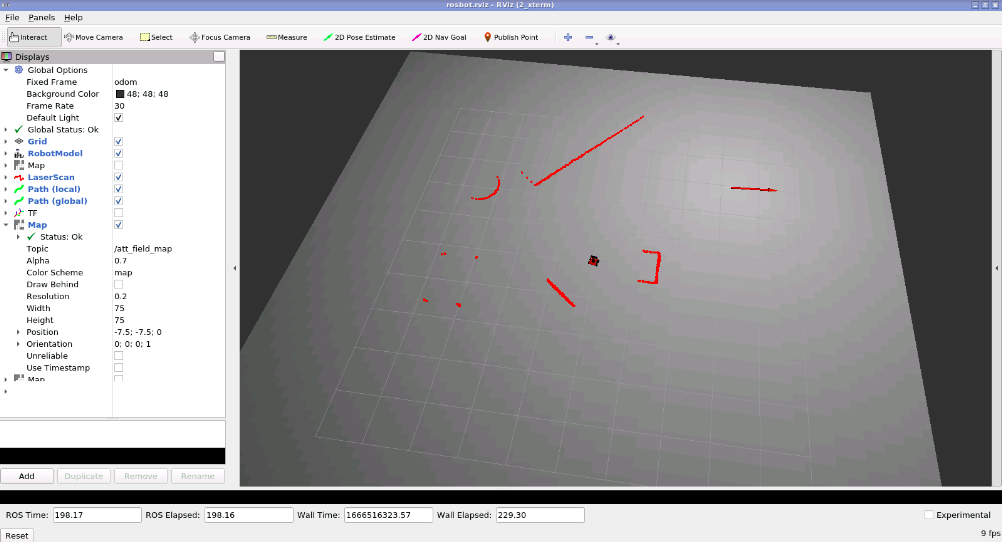
4. The repulsion field was also created based on the obstacle positions in the occupancy grid generated from task. The resulting force values were visualised asa another occupancy grid through topic '/rep_field_map' in Rviz.
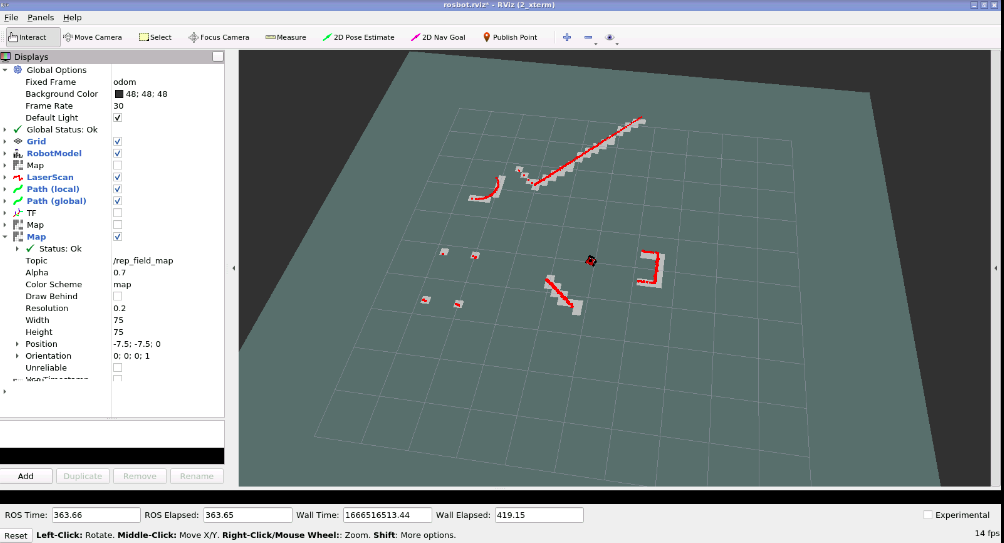
The following is the screenshot showing attraction and repulsion fields together
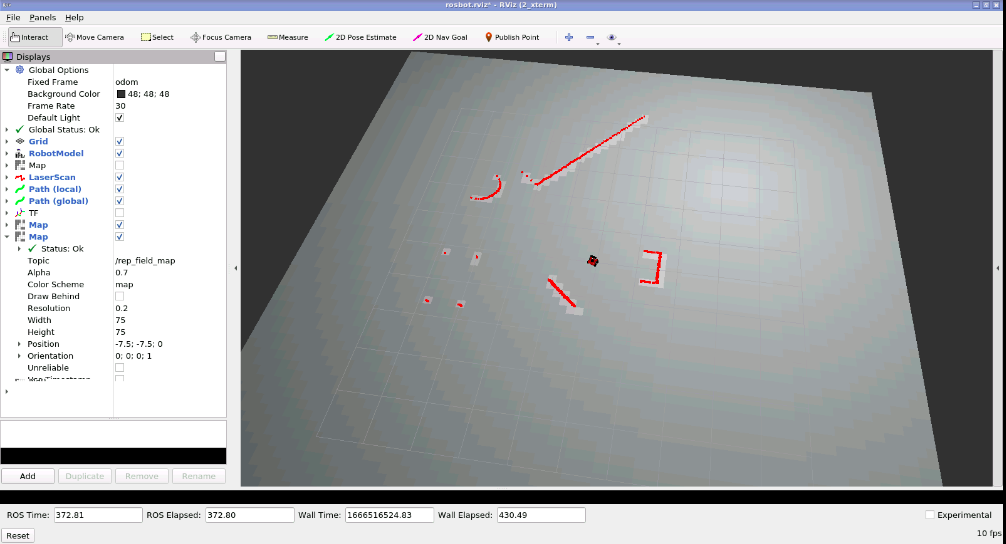
The following is the screenshot showing attraction and repulsion fields together with inflated obstacles
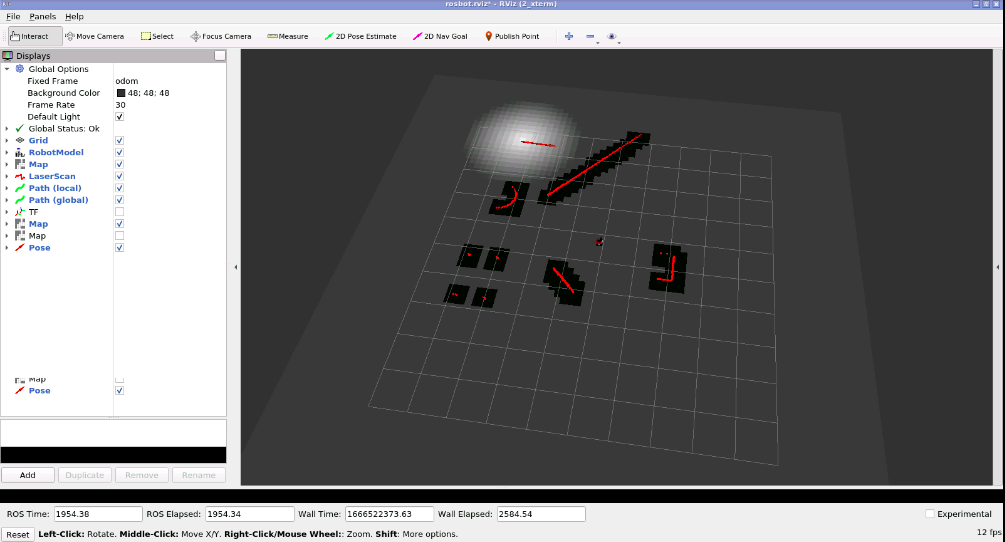
5. Velocity values were generated from the overall force values and they were published as Twist message to /cmd_vel topic. This caused the robot to move towards the goal and away from the obstacles. Tuning was done for the alpha and beta values for attraction and repulsion. Avoiding obstacles fails sometimes due to lidars not capturing the obstacles properly. 
The assignment_1 package consists of a gif named 'robot_compressed.gif' of the robot moving

***End of Task 3***

